In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlwings as xw
import os

### Solar Trace Data

In [149]:
path = r'Draft 2024 ISP Traces\Western_Downs_Hub_SAT_RefYear2011.csv'

# Load the data and convert it to a long format
solar_df = pd.read_csv(path).melt(id_vars=['Year', 'Month', 'Day'], var_name='Interval', value_name='MW')

# Convert year, mon, day and interval to a datetime
solar_df['IntervalStart'] = pd.to_datetime(solar_df[['Year', 'Month', 'Day']]) + pd.to_timedelta((solar_df['Interval'].astype(int) - 1) * 30, unit='m')
solar_df['IntervalEnd'] = solar_df['IntervalStart'] + pd.to_timedelta(30, unit='m')

solar_df = solar_df[['IntervalStart', 'IntervalEnd', 'MW']]
solar_df = solar_df.rename(columns={'MW': 'Solar'})

### Wind Trace Data

In [150]:
path = r'Draft 2024 ISP Traces\COOPGWF1_RefYear2011.csv'

# Load the data and convert it to a long format
wind_df = pd.read_csv(path).melt(id_vars=['Year', 'Month', 'Day'], var_name='Interval', value_name='MW')

# Convert year, mon, day and interval to a datetime
wind_df['IntervalStart'] = pd.to_datetime(wind_df[['Year', 'Month', 'Day']]) + pd.to_timedelta((wind_df['Interval'].astype(int) - 1) * 30, unit='m')
wind_df['IntervalEnd'] = wind_df['IntervalStart'] + pd.to_timedelta(30, unit='m')

wind_df = wind_df[['IntervalStart', 'IntervalEnd', 'MW']]
wind_df = wind_df.rename(columns={'MW': 'Wind'})

### Demand Trace Data

In [151]:
path = r'Draft 2024 ISP Traces\QLD_RefYear_2011_STEP_CHANGE_POE50_OPSO_MODELLING.csv'

# Load the data and convert it to a long format
demand_df = pd.read_csv(path).melt(id_vars=['Year', 'Month', 'Day'], var_name='Interval', value_name='MW')

# Convert year, mon, day and interval to a datetime
demand_df['IntervalStart'] = pd.to_datetime(demand_df[['Year', 'Month', 'Day']]) + pd.to_timedelta((demand_df['Interval'].astype(int) - 1) * 30, unit='m')
demand_df['IntervalEnd'] = demand_df['IntervalStart'] + pd.to_timedelta(30, unit='m')

demand_df = demand_df[['IntervalStart', 'IntervalEnd', 'MW']]
demand_df = demand_df.rename(columns={'MW': 'Demand_MW'})

### Combine Traces

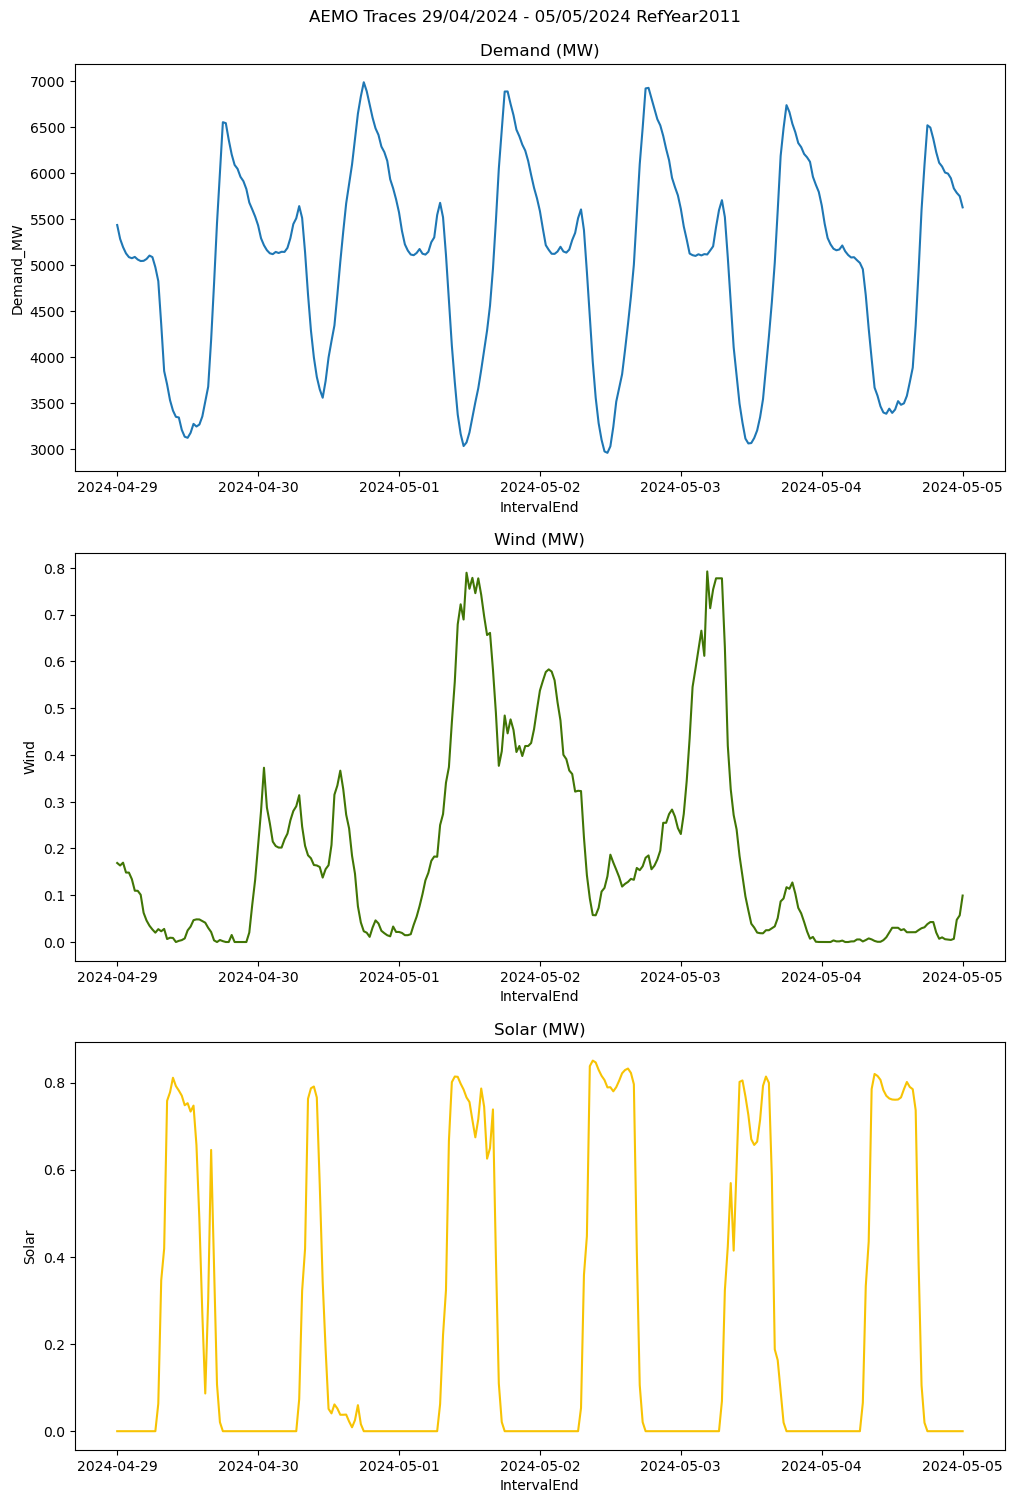

In [162]:
# Combine wind, solar and demand data
df = demand_df.merge(wind_df, on=['IntervalStart', 'IntervalEnd'], how='left').merge(solar_df, on=['IntervalStart', 'IntervalEnd'], how='left')

# plot only from 29/04/2024 to 05/05/2024
plot_df = df[(df['IntervalEnd'] >= '2024-04-29') & (df['IntervalEnd'] <= '2024-05-05')]

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

fig.suptitle('AEMO Traces 29/04/2024 - 05/05/2024 RefYear2011', y=0.91)  
axes[0].set_title('Demand (MW)')
sns.lineplot(plot_df, x='IntervalEnd', y='Demand_MW', ax=axes[0])

axes[1].set_title('Wind (MW)')
sns.lineplot(plot_df, x='IntervalEnd', y='Wind', ax=axes[1])
axes[1].lines[0].set_color('#417505')

axes[2].set_title('Solar (MW)')
sns.lineplot(plot_df, x='IntervalEnd', y='Solar', ax=axes[2])
# Set line colour for solar to f7c304
axes[2].lines[0].set_color('#f7c304')

plt.show()